Note: this notebook is set up to run with the env.yml containing the name 'polaris_datasets'

## Background
This is part of a release of experimental data determined at AstraZeneca on a set of compounds in the following assays: pKa, lipophilicity (LogD7.4), aqueous solubility, plasma protein binding (human, rat, dog , mouse and guinea pig), intrinsic clearance (human liver microsomes, human and rat hepatocytes). 

## Assay Information
Aqueous solubility is one of the most important properties in drug discovery, as it has profound impact on various drug properties, including biological activity, pharmacokinetics (PK), toxicity, and in vivo efficacy. Both kinetic and thermodynamic solubilities are determined during different stages of drug discovery and development. One way of assessing solubility is as follows:

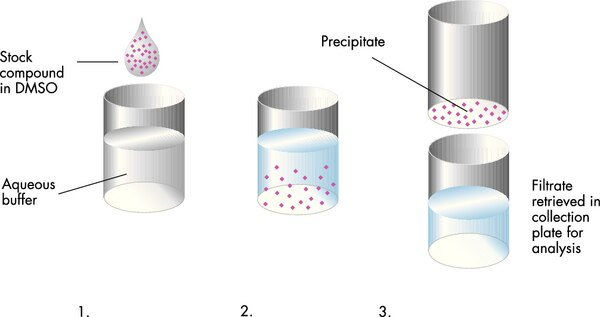

Image is from [here](https://www.emdmillipore.com/CA/en/product/MultiScreenHTS-PCF-Filter-Plates-for-Solubility-Assays,MM_NF-C8875?ReferrerURL=https%3A%2F%2Fwww.google.com%2F).


## Description of readout:
- **SOLUBILITY_74**: Solubility in pH7.4 buffer using solid starting material using the method described in J. Assoc. Lab. Autom. 2011, 16, 276-284, temperature-controlled (20 °C).

## Data resource

**Reference**: https://www.ebi.ac.uk/chembl/document_report_card/CHEMBL3301361/

**Raw data**: https://www.ebi.ac.uk/chembl/assay_report_card/CHEMBL3301364/

## Curation reproducibility
The curation process in this notebook can be reproduced by command line:

```shell
auroris curate org-Polaris/astra_zeneca/solubility/curation_config.json org-Polaris/astra_zeneca/solubility
```

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pathlib

import pandas as pd
import datamol as dm

root = pathlib.Path("__file__").absolute().parents[3]
# set to recipe root directory
os.chdir(root)
sys.path.insert(0, str(root))

In [2]:
org = "polaris"
data_name = "solubility"
dirname = dm.fs.join(root, f"org-{org}", "astra_zeneca", data_name)
gcp_root = f"gs://polaris-public/polaris-recipes/org-{org}/astra_zeneca/{data_name}"


# Load the data
source_data_path = "gs://polaris-public/polaris-recipes/org-polaris/astra_zeneca/solubility/CHEMBL3301364_raw.parquet"
data = pd.read_parquet(source_data_path)

/Users/lu.zhu/miniconda3/envs/po_dataset/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data.head(2).T

,0,1
action_type,None,None
activity_comment,None,None
activity_id,14759455,14759456
activity_properties,[],[]
assay_chembl_id,CHEMBL3301364,CHEMBL3301364
assay_description,ASTRAZENECA: Solubility in pH7.4 buffer using ...,ASTRAZENECA: Solubility in pH7.4 buffer using ...
assay_type,P,P
assay_variant_accession,None,None
assay_variant_mutation,None,None
bao_endpoint,BAO_0002135,BAO_0002135


If we look at the columns in this raw dataframe, we see there are a lot of columns that we don't need. We will focus only on necessary columns below.

In [4]:
columns_to_keep = [
    "canonical_smiles",
    "standard_value",
]
data = data[columns_to_keep].copy()

# Convert the readout to numeric values
data["standard_value"] = pd.to_numeric(data["standard_value"])

# Rename columns
data = data.rename(
    columns={
        "canonical_smiles": "SMILES",
        "standard_value": "SOLUBILITY_74",
    }
)

data

,SMILES,SOLUBILITY_74
0,O=C(O)c1cc2cc(Cl)ccc2n1Cc1ccc(Cl)c(Cl)c1,81300.0
1,COc1cc(OC2CNC2)ccc1Nc1ncc(Cl)c(-c2cnc3ccccn23)n1,81300.0
2,CCOC(=O)Nc1ccc2c(c1)N(C(=O)CCN1CCOCC1)c1ccccc1S2,83200.0
3,Nc1nc(-c2ccc(Cl)cc2)cs1,83200.0
4,CC(C)c1ccc2[nH]c3c(c2c1)CN(C(=O)[C@@H]1CCCC[C@...,83200.0
...,...,...
1758,Cn1cc(C(=O)NC[C@@H](O)CN2CCC(Oc3ccc(Cl)c(Cl)c3...,81300.0
1759,Cc1cccc(NS(=O)(=O)c2cccc3nonc23)c1,81300.0
1760,CCCSc1ncccc1C(=O)NC1CCCCC1,81300.0
1761,Cc1ccc(C(=O)Oc2ccc(C(O)CNC(C)(C)C)cc2OC(=O)c2c...,81300.0


### Run preliminary curation for data inspection

Typically, logS for aqueous solubility is used to access solubility because it provides a more practical and standardized approach for dealing with solubility data across various chemical compounds and experimental conditions. 

Therefore, we will convert the solubility (nM) to logS (mol/L). 

Compounds with 0 and higher solubility value are highly soluble, those in the range of 0 to −2 are soluble, those in the range of −2 to −4 are slightly soluble and insoluble if less than −4.

In [5]:
import numpy as np

data["logS_74"] = data["SOLUBILITY_74"].apply(lambda x: np.log10(x / 1e9))

In [6]:
# Define data column names
data_cols = ["logS_74"]
mol_col = "SMILES"

In [7]:
# import key curation components from auroris
from auroris.curation import Curator
from auroris.curation.actions import (
    MoleculeCuration,
    OutlierDetection,
    Deduplication,
    StereoIsomerACDetection,
    ContinuousDistributionVisualization,
)

# Define the curation workflow
curator = Curator(
    data_path=source_data_path,
    steps=[
        MoleculeCuration(input_column=mol_col, y_cols=data_cols),
        ContinuousDistributionVisualization(y_cols=data_cols),
        OutlierDetection(
            method="zscore", columns=data_cols, threshold=3, use_modified_zscore=True
        ),
        StereoIsomerACDetection(y_cols=data_cols, threshold=3),
    ],
    parallelized_kwargs={"n_jobs": -1},
)

curator.to_json(f"{dirname}/inspection_config.json")

In [8]:
# Run the curation step defined as above
data_inspection, report = curator(data)

2024-07-10 01:57:57.052 | INFO     | auroris.curation._curator:transform:106 - Performing step: mol_curation
2024-07-10 01:58:16.920 | INFO     | auroris.curation._curator:transform:106 - Performing step: distribution
2024-07-10 01:58:16.968 | INFO     | auroris.curation._curator:transform:106 - Performing step: outlier_detection
2024-07-10 01:58:17.022 | INFO     | auroris.curation._curator:transform:106 - Performing step: ac_stereoisomer


In [9]:
#  get the curation logger
from auroris.report.broadcaster import LoggerBroadcaster

broadcaster = LoggerBroadcaster(report)
broadcaster.broadcast()

===== Curation Report =====
Time: 2024-07-10 01:57:57
Version: dev
===== mol_curation =====
[LOG]: New column added: MOL_smiles
[LOG]: New column added: MOL_molhash_id
[LOG]: New column added: MOL_molhash_id_no_stereo
[LOG]: New column added: MOL_num_stereoisomers
[LOG]: New column added: MOL_num_undefined_stereoisomers
[LOG]: New column added: MOL_num_defined_stereo_center
[LOG]: New column added: MOL_num_undefined_stereo_center
[LOG]: New column added: MOL_num_stereo_center
[LOG]: New column added: MOL_undefined_E_D
[LOG]: New column added: MOL_undefined_E/Z
[LOG]: Default `ecfp` fingerprint is used to visualize the chemical space.
[LOG]: Molecules with undefined stereocenter detected: 156.
[IMG]: Dimensions 1200 x 600
[IMG]: Dimensions 1200 x 2400
===== distribution =====
[IMG]: Dimensions 1200 x 600
===== outlier_detection =====
[LOG]: New column added: OUTLIER_logS_74
[LOG]: Found 0 potential outliers with respect to the logS_74 column for review.
[IMG]: Dimensions 1200 x 600
====

In [10]:
# Generate an HTML report with embedded visualizations showcasing the data analysis.
from utils.auroris_utils import HTMLBroadcaster

# export report to local directory
broadcaster = HTMLBroadcaster(report, f"{dirname}/inspection_report")
report_path = broadcaster.broadcast()

In [11]:
# check the curated data
data_inspection.describe(include="all")

,SMILES,SOLUBILITY_74,logS_74,MOL_smiles,MOL_molhash_id,MOL_molhash_id_no_stereo,MOL_num_stereoisomers,MOL_num_undefined_stereoisomers,MOL_num_defined_stereo_center,MOL_num_undefined_stereo_center,MOL_num_stereo_center,MOL_undefined_E_D,MOL_undefined_E/Z,OUTLIER_logS_74,AC_logS_74
count,1763,1.763000e+03,1763.000000,1763,1763,1763,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763,1763.0,1763,1763
unique,1763,NaN,NaN,1763,1763,1728,NaN,NaN,NaN,NaN,NaN,2,1.0,1,1
top,O=C(O)c1cc2cc(Cl)ccc2n1Cc1ccc(Cl)c(Cl)c1,NaN,NaN,O=C(O)c1cc2cc(Cl)ccc2n1Cc1ccc(Cl)c(Cl)c1,f5be0bbd0758d40152026077e31e8894ee087a8b,a42f41ec4838fe42b901c794265d1113cad19f92,NaN,NaN,NaN,NaN,NaN,False,0.0,False,False
freq,1,NaN,NaN,1,1,5,NaN,NaN,NaN,NaN,NaN,1617,1763.0,1763,1763
mean,NaN,1.877717e+05,-4.490631,NaN,NaN,NaN,2.372660,1.140102,0.315372,0.099263,0.414634,NaN,NaN,NaN,NaN
std,NaN,3.277080e+05,0.966107,NaN,NaN,NaN,14.676151,1.544349,0.793222,0.349825,0.839539,NaN,NaN,NaN,NaN
min,NaN,1.000000e+02,-7.000000,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,5.400000e+03,-5.267606,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,3.630000e+04,-4.440093,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,NaN,1.950000e+05,-3.709965,NaN,NaN,NaN,2.000000,1.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN


## Chemical space coverage of the dataset

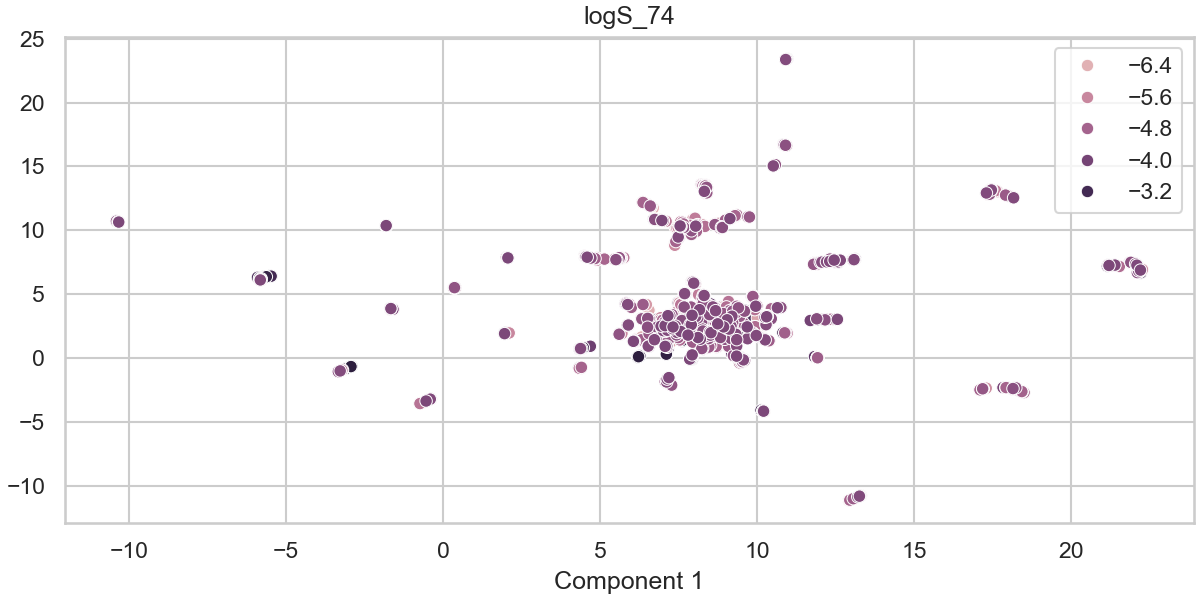

## Distribution of logS (mol/L)

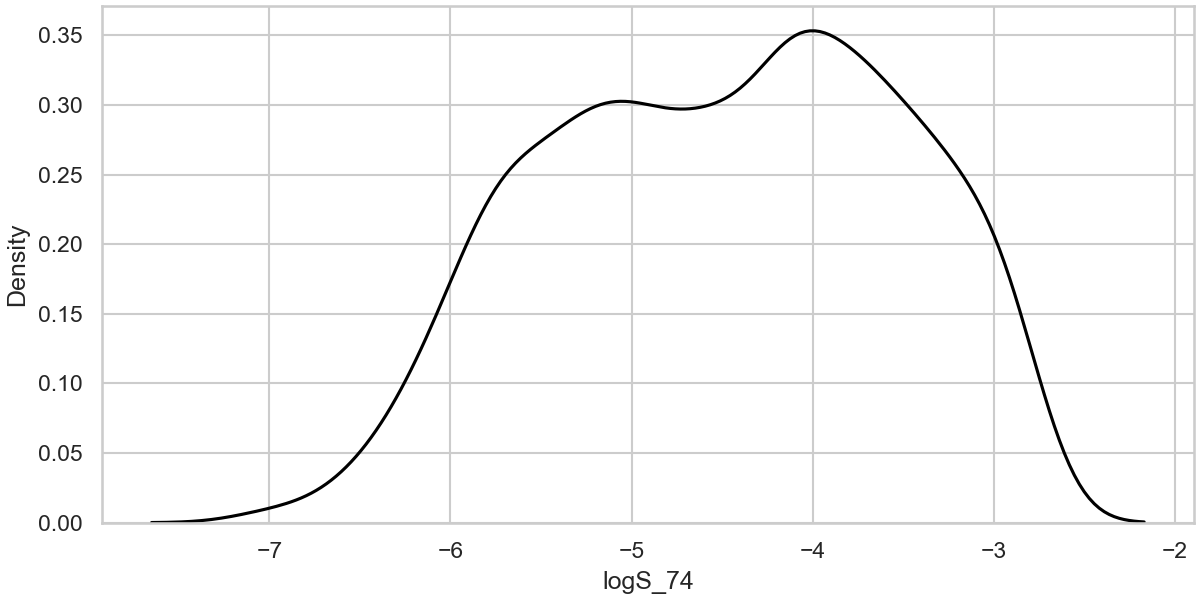

More than 30% of the molecules logS value greater than -4.

### Re-run curation, removing molecules as needed

In [12]:
# import key curation components from auroris
from auroris.curation import Curator
from auroris.curation.actions import (
    MoleculeCuration,
    OutlierDetection,
    Deduplication,
    StereoIsomerACDetection,
    ContinuousDistributionVisualization,
)

# Define the curation workflow
curator = Curator(
    data_path=source_data_path,
    steps=[
        MoleculeCuration(input_column=mol_col, y_cols=data_cols),
        ContinuousDistributionVisualization(y_cols=data_cols),
        Deduplication(
            deduplicate_on=mol_col, y_cols=data_cols
        ),  # remove the replicated molecules
        OutlierDetection(
            method="zscore", columns=data_cols, threshold=3, use_modified_zscore=True
        ),
        StereoIsomerACDetection(y_cols=data_cols, threshold=3),
    ],
    parallelized_kwargs={"n_jobs": -1},
)

In [13]:
# The final curation configuration is exported for reproducibility
path = f"{gcp_root}/data/curation/curation_config.json"
curator.to_json(path)

In [14]:
# Run the curation step defined as above
data_curated, report = curator(data)

2024-07-10 01:58:19.076 | INFO     | auroris.curation._curator:transform:106 - Performing step: mol_curation
2024-07-10 01:58:25.230 | INFO     | auroris.curation._curator:transform:106 - Performing step: distribution
2024-07-10 01:58:25.278 | INFO     | auroris.curation._curator:transform:106 - Performing step: deduplicate
2024-07-10 01:58:26.160 | INFO     | auroris.curation._curator:transform:106 - Performing step: outlier_detection
2024-07-10 01:58:26.214 | INFO     | auroris.curation._curator:transform:106 - Performing step: ac_stereoisomer


In [15]:
broadcaster = LoggerBroadcaster(report)
broadcaster.broadcast()

===== Curation Report =====
Time: 2024-07-10 01:58:19
Version: dev
===== mol_curation =====
[LOG]: New column added: MOL_smiles
[LOG]: New column added: MOL_molhash_id
[LOG]: New column added: MOL_molhash_id_no_stereo
[LOG]: New column added: MOL_num_stereoisomers
[LOG]: New column added: MOL_num_undefined_stereoisomers
[LOG]: New column added: MOL_num_defined_stereo_center
[LOG]: New column added: MOL_num_undefined_stereo_center
[LOG]: New column added: MOL_num_stereo_center
[LOG]: New column added: MOL_undefined_E_D
[LOG]: New column added: MOL_undefined_E/Z
[LOG]: Default `ecfp` fingerprint is used to visualize the chemical space.
[LOG]: Molecules with undefined stereocenter detected: 156.
[IMG]: Dimensions 1200 x 600
[IMG]: Dimensions 1200 x 2400
===== distribution =====
[IMG]: Dimensions 1200 x 600
===== deduplicate =====
[LOG]: Deduplication merged and removed 0 duplicated molecules from dataset
===== outlier_detection =====
[LOG]: New column added: OUTLIER_logS_74
[LOG]: Found 0

In [16]:
# Export report to polaris public directory on GCP
# The report is ready to reviewed in the HTML file.
broadcaster = HTMLBroadcaster(
    report, f"{gcp_root}/data/curation/report", embed_images=True
)
broadcaster.broadcast()

'gs://polaris-public/polaris-recipes/org-polaris/astra_zeneca/solubility/data/curation/report/index.html'

## Export the final curated data

In [17]:
fout = f"{gcp_root}/data/curation/{data_name}_curated.csv"
data_curated.reset_index(drop=True).to_csv(fout, index=False)